In [1]:
!pip install mlflow pyyaml matplotlib


     --------------------------------------- 24.7/24.7 MB 18.2 MB/s eta 0:00:00
     -------------------------------------- 162.3/162.3 KB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 7.8/7.8 MB 22.7 MB/s eta 0:00:00
     ------------------------------------- 242.5/242.5 KB 15.5 MB/s eta 0:00:00
     --------------------------------------- 46.2/46.2 MB 18.7 MB/s eta 0:00:00
     --------------------------------------- 25.8/25.8 MB 21.1 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 40.7 MB/s eta 0:00:00
     -------------------------------------- 103.3/103.3 KB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 27.0 MB/s eta 0:00:00
     -------------------------------------- 147.8/147.8 KB 2.9 MB/s eta 0:00:00
     --------------------------------------- 11.2/11.2 MB 21.1 MB/s eta 0:00:00
     ---------------------------------------- 56.2/56.2 KB 1.5 MB/s eta 0:00:00
     --------------------------------------

You should consider upgrading via the 'C:\Users\dansh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
import mlflow
import yaml
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
config = {
    'learning_rate': 0.001,
    'batch_size': 32,
    'epochs': 5
}

with open("config.yaml", "w") as f:
    yaml.dump(config, f)

with open("config.yaml", "r") as f:
    loaded_config = yaml.safe_load(f)

print("Конфігурація завантажена:", loaded_config)


Конфігурація завантажена: {'batch_size': 32, 'epochs': 5, 'learning_rate': 0.001}


In [5]:
mlflow.set_tracking_uri("file:" + os.path.abspath("mlruns"))

mlflow.set_experiment("Lab4_MLflow_Experiment")

def train_and_log(config):
    with mlflow.start_run(run_name=f"LR={config['learning_rate']}"):
        mlflow.log_params(config)
        
        for epoch in range(config['epochs']):
            train_loss = np.exp(-epoch) + np.random.rand() * 0.1
            val_accuracy = 0.5 + epoch * 0.1 + np.random.rand() * 0.05
            mlflow.log_metric("train_loss", train_loss, step=epoch)
            mlflow.log_metric("val_accuracy", val_accuracy, step=epoch)

        with open("best_model.txt", "w") as f:
            f.write("Simulated model weights")

        mlflow.log_artifact("best_model.txt")

train_and_log(loaded_config)

In [6]:
import pandas as pd

experiment = mlflow.get_experiment_by_name("Lab4_MLflow_Experiment")
runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])
runs_df[["run_id", "params.learning_rate", "metrics.val_accuracy", "metrics.train_loss", "start_time"]]


,run_id,params.learning_rate,metrics.val_accuracy,metrics.train_loss,start_time
0,0538c6f734dc4a43bb0af1bfb2261343,0.001,0.945034,0.079874,2025-06-14 06:25:51.029000+00:00


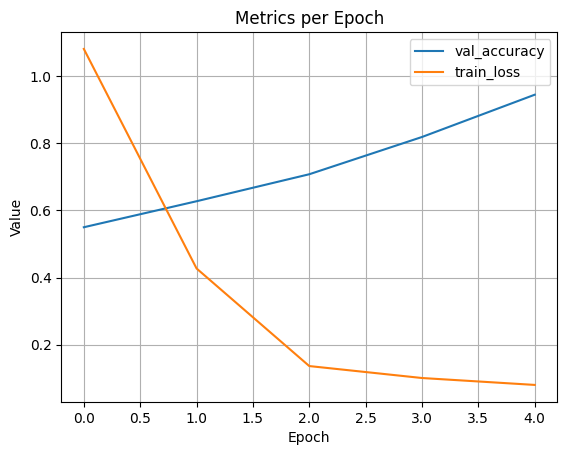

In [7]:
import json

last_run_id = runs_df.iloc[0]["run_id"]
metrics_dir = os.path.join("mlruns", experiment.experiment_id, last_run_id, "metrics")

with open(os.path.join(metrics_dir, "val_accuracy")) as f:
    val_accuracy_data = [line.strip().split() for line in f.readlines()]
val_accuracy = [float(v[1]) for v in val_accuracy_data]

with open(os.path.join(metrics_dir, "train_loss")) as f:
    train_loss_data = [line.strip().split() for line in f.readlines()]
train_loss = [float(v[1]) for v in train_loss_data]

plt.plot(val_accuracy, label="val_accuracy")
plt.plot(train_loss, label="train_loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.title("Metrics per Epoch")
plt.grid(True)
plt.show()


In [ ]:
!mlflow ui